# Reinforcement Learning
Prof. Milica Gašić

### Monte Carlo and Temporal Difference Prediction



#### Implementation

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from random import random
import matplotlib
import matplotlib.pyplot as plt


We have implemented the environment for generating random walk episodes below. 

In [2]:
def random_walk_rollout(n_states=5, left_reward=0, right_reward=1):
    terminal_states = [0, n_states-1]
    s = n_states//2 # start in the middle
    e = [s]   # episode
    while s not in terminal_states:
        # do random action 'right' or 'left'
        s += 1 if random() > 0.5 else -1     # next state
        if s == n_states - 1:
            r = right_reward
        elif s == 0:
            r = left_reward
        else:
            r = 0
        e.extend([float(r), s])
    return e

Your task is to implement value iteration for computing value estimates for the episodes. Start with update per episode, and then call the function in a loop.

In [74]:
def MC_step_inc(V, e, gamma, alpha):
    #######################################################################
    # TODO  implement monte carlo prediction update for one episode       #
    #######################################################################
    # every-visit MC
    g = 0
    for i in reversed(range(0, len(e) - 1, 2)):
        reward, state = e[i + 1], e[i]
        g = reward + gamma * g
        V[state] += alpha * (g - V[state])
    #######################################################################
    # End of your code.                                                   #
    #######################################################################

def TD_step(V, e, gamma, alpha):
    #######################################################################
    # TODO  implement TD prediction update for one episode                #
    #######################################################################
    for i in range(0, len(e) - 1, 2):
        reward, state = e[i + 1], e[i]
        next_state = e[i + 2]
        V[state] += alpha * (reward + gamma * V[next_state] - V[state])
    #######################################################################
    # End of your code.                                                   #
    #######################################################################

We would like to track how our value estimates converge over time. Complete the code below using the functions you have implemented above.

In [77]:

def RMSError(v0, v1):
    return np.sqrt(((v0-v1)**2).mean())

def mc_compute_v(episodes, alpha):

    n_episodes = len(episodes)
    rms = np.zeros(n_episodes)

    for k in range(n_episodes):
        v = np.zeros(n_states)

        #######################################################################
        # TODO call the episode-wise MC update you have implemented above     #
        # and maintain a list tracking the RMS error of the estimate          #
        #######################################################################
        for i in range(k):
            MC_step_inc(v, episodes[i], gamma, alpha)
        rms[k] = RMSError(v, v_true)
        #######################################################################
        # End of your code.                                                   #
        #######################################################################

    rms /= 100

    return v, rms


def td_compute_v(episodes, alpha):

    n_episodes = len(episodes)
    rms = np.zeros(n_episodes)

    for k in range(n_episodes):
        v = np.zeros(n_states)
        #######################################################################
        # TODO call the episode-wise TD update you have implemented above     #
        # and maintain a list tracking the RMS error of the estimate          #
        #######################################################################
        for i in range(k):
            TD_step(v, episodes[i], gamma, alpha)
        rms[k] = RMSError(v, v_true)
        #######################################################################
        # End of your code.                                                   #
        #######################################################################

    rms /= 100

    return v, rms


Call the functions above to answer the questions:
* How does MC and TD differs?
* What is the influence of alpha on the convergence?


====== MC ======

alpha:0.001
[0.         0.15354639 0.43039199 0.48312687 0.        ]
alpha:0.002
[0.         0.21012977 0.48753432 0.65442081 0.        ]
alpha:0.003
[0.         0.23296322 0.50082427 0.71511565 0.        ]
alpha:0.01
[0.         0.28261351 0.54479799 0.76051847 0.        ]

====== TD ======

alpha:0.01
[0.         0.25706967 0.47340028 0.73882473 0.        ]
alpha:0.02
[0.         0.27868785 0.48614914 0.76426049 0.        ]
alpha:0.05
[0.         0.3048953  0.51310098 0.79885739 0.        ]


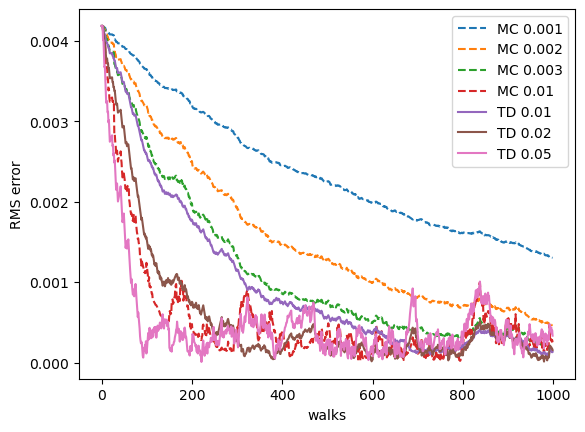

In [78]:
episodes = []

gamma = 1.0
n_states = 5
n_episodes = 1000
td_alphas=[0.01, 0.02, 0.05]
mc_alphas=[0.001, 0.002, 0.003, 0.01]

v_true = [0, 1/4, 2/4, 3/4, 0]

# rollout episodes
for _ in range(n_episodes):
    episodes.append(random_walk_rollout(n_states = n_states))

# value estimates with MC:
print("\n====== MC ======\n")
for alpha in mc_alphas:
    print(f"alpha:{alpha}")
    v, rms = mc_compute_v(episodes, alpha)
    plt.plot(rms, '--', label=f'MC {alpha}')
    print(v)

# value estimates with TD:
print("\n====== TD ======\n")
for alpha in td_alphas:
    print(f"alpha:{alpha}")
    v, rms = td_compute_v(episodes, alpha)
    plt.plot(rms, label=f'TD {alpha}')
    print(v)

plt.xlabel('walks')
plt.ylabel('RMS error')
plt.legend()
plt.show()